In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import files
files = files.upload()


Saving inventory.csv to inventory.csv
Saving Orders_till0822.csv to Orders_till0822.csv
Saving Prop2.csv to Prop2.csv


# Dataprocessing

In [148]:
# xi
df = pd.read_csv("Orders_till0822.csv")
df.loc[:, 'Origine'] = df.Origine.apply(lambda x: x.lstrip('0'))
df.rename(columns={'Origine' : 'SKU'}, inplace=True)
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
data = pd.read_csv('Prop2.csv', sep=';')
merged_data = pd.merge(df, data, on='SKU', how='inner')
merged_data.set_index('Order_Date', inplace=True)
merged_data.sort_index(inplace=True)
products_bed = list(set(merged_data[merged_data['Product type'] == 'Armoire']['SKU']))
Bed = merged_data[merged_data['Product type'] == 'Armoire']
sales_data_bed = merged_data[merged_data['Product type'] == 'Armoire'].pivot_table(index=merged_data[merged_data['Product type'] == 'Armoire'].index, columns='SKU', values='Quantity', aggfunc='sum').fillna(0)
sales_data_bed

<ipython-input-148-eb329e4c193f>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Orders_till0822.csv")


SKU,10072,10073,10074,10102,10103,10104,10178,10179,10184,10185,...,7276970B1,7276970B2,9018045B1,9018045B2,9022038,9023038,9024038,9054971,9070971B1,9071971B1
Order_Date,,,,,,,,,,,,,,,,,,,,,
2016-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-12-30,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
2016-12-31,2.0,0.0,5.0,2.0,7.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
2017-01-01,0.0,0.0,3.0,9.0,8.0,1.0,2.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
SKU_bed = sales_data_bed.columns
len(SKU_bed)

145

In [151]:
inventory = pd.read_csv("inventory.csv")
inventory['Date'] = pd.to_datetime(inventory['Date'])
inventory.set_index('Date', inplace=True)
inventory.sort_index(inplace=True)
inventory = inventory.pivot_table(index=inventory.index, columns='Origine', values='Inventory', fill_value='0', aggfunc='sum')
col_inter = list(set(sales_data_bed.columns) & set(inventory.columns))
inventory = inventory[col_inter]
inventory.fillna(0, inplace=True)
inventory = inventory.astype(int)

In [152]:
SKU = list(sales_data_bed.columns)
start = sales_data_bed.index[-8]
end = sales_data_bed.index[-1]
SKU_week = sales_data_bed[col_inter][pd.Timestamp(end) - pd.Timedelta(days=6):pd.Timestamp(end)]
SKU_week

SKU,10313,10347,10384,10187,3640038,10178,10345,11257,7276970,10104,...,10342,10230,10471,11183,10475,13242,5370038B2,13079,9054971,12948
Order_Date,,,,,,,,,,,,,,,,,,,,,
2022-08-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2022-08-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
2022-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0
2022-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,14.0,2.0,0.0,0.0,0.0
2022-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
2022-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,10.0,2.0,0.0,0.0,0.0
2022-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0


In [153]:
Se = inventory[pd.Timestamp(end) - pd.Timedelta(days=6):pd.Timestamp(end)] #last days
Bed = Bed[Bed["SKU"].isin(Se.columns)]
Bed.SKU.unique().shape

(120,)

In [154]:
S = {f"d{i}" : list(Se.loc[:, (Se.iloc[i]>0)].iloc[i].index) for i in range(0, 5)}
S

{'d0': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '13242',
  '5370038B2',
  '13079'],
 'd1': ['7246722',
  '3519038',
  '11300',
  '10326',
  '11180',
  '11301',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '11182',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '11183',
  '13242',
  '5370038B2',
  '13079'],
 'd2': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',

# Attributes

In [167]:
attributes = ['SKU', 'Category', 'Collection', 'Finish', 'Style']

for attribute in attributes :
    print(f'{attribute} : {len(Bed[attribute].unique())}')

SKU : 120
Category : 7
Collection : 18
Finish : 23
Style : 8


In [160]:
Categories = Bed['Category'].unique()
Collection = Bed['Collection'].unique()
Finish = Bed['Finish'].unique()
#Size = Bed['Size'].unique()
Style = Bed['Style'].unique()

In [157]:
Bed[attributes]

,SKU,Category,Collection,Finish,Style
Order_Date,,,,,
2016-12-20,3580038,Nursery,Savannah,Pure White,Coastal
2016-12-29,3680038,Nursery,Angel,Pure White,Traditional
2016-12-29,3232038,Master Bedroom,Prairie,Country Pine,Country
2016-12-29,3580038,Nursery,Savannah,Pure White,Coastal
2016-12-30,5370038B1,Master Bedroom,Acapella,Pure Black,Contemporary
...,...,...,...,...,...
2022-08-12,7170971,Kitchen and Dining Room,Axess,Pure Black,Contemporary
2022-08-12,7260722,Entryway,Morgan,Pure White,Traditional
2022-08-12,7246722,Entryway,Morgan,Royal Cherry,Traditional


In [158]:
Se

Origine,10313,10347,10384,10187,3640038,10178,10345,11257,7276970,10104,...,10342,10230,10471,11183,10475,13242,5370038B2,13079,9054971,12948
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,170,142,5,0,0
2022-08-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,73,0,149,136,5,0,0
2022-08-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,113,500,5,0,1
2022-08-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,216,0,312,1446,15,0,0
2022-08-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,148,0,194,224,10,0,0


To get the attributes from the sku

In [159]:
def sku_to_attributes(sku) :
    return Bed[attributes].loc[Bed[attributes]["SKU"] == sku].drop('SKU', axis=1).iloc[0].values.tolist()

In [ ]:
#constant of the problem :
N = 5 #nb of distinct skus during the period P
N_sku = len(SKU_bed) #nb of distinct in the product type. N_sku >= N
N_Category, N_Collection, N_Finish, N_Style = [len(Bed[attribute].unique()) for attribute in attributes[1:]] #nb of distinct levels for each columns
m = N_Category + N_Collection + N_Finish + N_Style
p = N_Category**2 + N_Collection**2 + N_Finish**2 + N_Style**2


In [ ]:
f_Category = np.random.uniform(0, 1, N_Category) #calcul of faia fraction of customer who prefer level u of of attribute a.
f_Category = f_Category/np.linalg.norm(f_Category, 1)
S_Category = np.sum(np.exp(f_Category))
f_Category_rep = np.exp(f_Category)/S_Category #reparametrization for the constraints

f_Collection = np.random.uniform(0, 1, N_Collection)
f_Collection = f_Collection/np.linalg.norm(f_Collection, 1)
S_Collection = np.sum(np.exp(f_Collection))
f_Collection_rep = np.exp(f_Collection)/S_Collection

f_Finish = np.random.uniform(0, 1, N_Finish)
f_Finish = f_Finish/np.linalg.norm(f_Finish, 1)
S_Finish = np.sum(np.exp(f_Finish))
f_Finish_rep = np.exp(f_Finish)/S_Finish

#f_Size = np.random.uniform(0, 1, N_Size)
#f_Size = f_Size/np.linalg.norm(f_Size, 1)
#S_Size = np.sum(np.exp(f_Size))
#f_Size_rep = np.exp(f_Size)/S_Size


f_Style = np.random.uniform(0, 1, N_Style)
f_Style = f_Style/np.linalg.norm(f_Style, 1)
S_Style = np.sum(np.exp(f_Style))
f_Style_rep = np.exp(f_Style)/S_Style

In [ ]:
d_Category = {category : prop for category, prop in zip(Categories, f_Category_rep)} #to compute the fi
d_Collection = {col : prop for col, prop in zip(Collection, f_Collection_rep)}
d_Finish = {finish : prop for finish, prop in zip(Finish, f_Finish_rep)}
#d_Size = {size : prop for size, prop in zip(Size, f_Size_rep)}
d_Style = {style : prop for style, prop in zip(Style, f_Style_rep)}
print(d_Style)

{'Contemporary': 0.27432189203421264, 'Coastal': 0.4493962251881559, 'Industrial': 0.27628188277763155}


In [ ]:
f = [] #computing of fi product of faia
for i, sku in enumerate(SKU_week.columns) :
    attr = sku_to_attributes(sku)
    f.append((d_Category[attr[0]]*d_Collection[attr[1]]*d_Finish[attr[2]]*d_Style[attr[3]]))
f = np.array(f)


# Computing of pi matrix, where pi_ij is the proba that cust prefering i substitute i by j if i is not available

In [ ]:
#computing of pi_aia
pi_Category = np.random.uniform(0, 1, (N_Category, N_Category))
pi_Category_rep = np.exp(pi_Category)/(1 + np.exp(pi_Category))
np.fill_diagonal(pi_Category_rep, 1)

pi_Collection = np.random.uniform(0, 1, (N_Collection, N_Collection))
pi_Collection_rep = np.exp(pi_Collection)/(1 + np.exp(pi_Collection))
np.fill_diagonal(pi_Collection_rep, 1)

pi_Finish = np.random.uniform(0, 1, (N_Finish, N_Finish))
pi_Finish_rep = np.exp(pi_Finish)/(1 + np.exp(pi_Finish))
np.fill_diagonal(pi_Finish_rep, 1)

#pi_Size = np.random.uniform(0, 1, (N_Size, N_Size))
#pi_Size_rep = np.exp(pi_Size)/(1 + np.exp(pi_Size))
#np.fill_diagonal(pi_Size_rep, 1)

pi_Style = np.random.uniform(0, 1, (N_Style, N_Style))
pi_Style_rep = np.exp(pi_Style)/(1 + np.exp(pi_Style))
np.fill_diagonal(pi_Style_rep, 1)

I link each level of attributes with coordonate

In [ ]:
coord_category = {category : i for i, category in enumerate(Categories)}
coord_collection = {collection : i for i,  collection in enumerate(Collection)}
coord_finish = {finish : i for i,  finish in enumerate(Finish)}
#coord_size = {size : i for i, size in enumerate(Size)}
coord_style = {style : i for i, style in enumerate(Style)}
coord_category

{'Craft': 0}

PI matrix

In [ ]:
# Pre-compute sku_to_attributes
N_sku = len(SKU_bed)
PI = np.zeros((N_sku, N_sku))

# Cache the attribute lookup and coordinate assignments
attri_SKUs = [sku_to_attributes(sku) for sku in SKU_bed]
coords = [
    [
        coord_category[attri[0]],
        coord_collection[attri[1]],
        coord_finish[attri[2]],
        coord_style[attri[3]]
    ]    for attri in attri_SKUs
]

KeyError: ignored

In [ ]:
N_sku, N

(24, 5)

In [ ]:
for i in range(N_sku):
    coord_sku_i = coords[i]

    for j in range(N_sku):
        coord_sku_j = coords[j]

        PI[i, j] = (
            pi_Category_rep[coord_sku_i[0], coord_sku_j[0]] *
            pi_Collection_rep[coord_sku_i[1], coord_sku_j[1]] *
            pi_Finish_rep[coord_sku_i[2], coord_sku_j[2]] *
            #pi_Size_rep[coord_sku_i[3], coord_sku_j[3]]
            pi_Style_rep[coord_sku_i[3], coord_sku_j[3]]
        )


In [168]:
Se = inventory[pd.Timestamp(end) - pd.Timedelta(days=6):pd.Timestamp(end)] #last days
S = {f"d{i}" : list(Se.loc[:, (Se.iloc[i]>0)].iloc[i].index) for i in range(5)}
S

{'d0': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '13242',
  '5370038B2',
  '13079'],
 'd1': ['7246722',
  '3519038',
  '11300',
  '10326',
  '11180',
  '11301',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '11182',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '11183',
  '13242',
  '5370038B2',
  '13079'],
 'd2': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',

In [169]:
S = {f"d{i}" : list(Se.loc[:, (Se.iloc[i]>0)].iloc[i].index) for i in range(5)}
S

{'d0': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '13242',
  '5370038B2',
  '13079'],
 'd1': ['7246722',
  '3519038',
  '11300',
  '10326',
  '11180',
  '11301',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '11182',
  '13080',
  '13076',
  '5370038B1',
  '10382',
  '12276',
  '11179',
  '10329',
  '7246971',
  '7270970',
  '3580038',
  '7270722',
  '12949',
  '13243',
  '12277',
  '5350038B1',
  '7206970',
  '7260971',
  '13075',
  '12950',
  '5350038B2',
  '11183',
  '13242',
  '5370038B2',
  '13079'],
 'd2': ['7246722',
  '3519038',
  '10326',
  '11180',
  '13078',
  '13077',
  '7170971',
  '7270971',
  '7260722',
  '13080',
  '13076',
  '5370038B1',
  '10382',

In [ ]:
Se.loc[:, (Se.sum() > 0)]

Origine,7550729B2,12439,12404,13197,13192,7550729B1,13196,12403,7260727,13193,12438
Date,,,,,,,,,,,
2022-08-06,93,134,537,147,0,93,125,574,198,0,64
2022-08-09,0,135,239,471,132,0,529,145,193,120,61
2022-08-10,148,135,236,489,50,46,530,142,192,36,61
2022-08-11,45,402,1140,588,147,294,522,1314,573,105,129
2022-08-12,628,266,270,1088,158,98,1170,124,380,136,84


In [170]:
def find_column(value) : #to have a good initial_guess
  for column in Bed[attributes].columns :
    if value in Bed[attributes][column].values :
      return column
  return None

find_column("Entryway")

'Category'

In [172]:
from collections import defaultdict #to have a good initial_guess
count_attr = defaultdict(int)
attr_per_cat = defaultdict(list)
for sku in Bed.SKU.unique() :
  attribs_sku = sku_to_attributes(sku)
  for attrib in attribs_sku :
    count_attr[attrib] += Se[sku].sum()
count_attr
for key in count_attr :
  attr_per_cat[find_column(key)].append((key, count_attr[key]))
attr_per_cat

defaultdict(list,
            {'Category': [('Nursery', 1736),
              ('Master Bedroom', 14406),
              ('Entryway', 19745),
              ('Dining Room', 0),
              ('Kitchen and Dining Room', 798),
              ('Playroom', 0),
              ('Home Office', 5256)],
             'Collection': [('Savannah', 1736),
              ('Angel', 0),
              ('Prairie', 0),
              ('Acapella', 8090),
              ('Morgan', 14533),
              ('Axess', 798),
              ('Noble', 0),
              ('Karbon', 0),
              ('Step One', 0),
              ('Crea', 5256),
              ('Cotton Candy', 0),
              ('Aviron', 0),
              ('Vito', 2164),
              ('Beehive', 0),
              ('Kanji', 0),
              ('Hopedale', 0),
              ('Versa', 2611),
              ('Farnel', 6753)],
             'Finish': [('Pure White', 17249),
              ('Country Pine', 0),
              ('Pure Black', 11008),
              ('Morgan 

In [80]:
print(len(count_attr.keys()), m)

56 63


In [173]:
#now I can build a good initial_guess
vec_f = []
for attribute, list_of_level_of_attribute in attr_per_cat.items() :
  norm = np.sum([t[1] for t in list_of_level_of_attribute])
  for t in list_of_level_of_attribute :
    vec_f.append(t[1]/norm)
print(len(vec_f), m)

56 56


In [175]:
initial_guess = np.concatenate(((Se.sum()/Se.sum().sum()).values, 0.1*np.ones(p)))
print(initial_guess.shape, m+p)

(1086,) 1022


The optimization function

In [177]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
###############################

attributes = ['SKU', 'Category', 'Collection', 'Finish', 'Style']
X = [SKU_week.iloc[i].values for i in range(5)] #x1, ..., x4 where xi = sales of day i for each sku
epsilon = 1e-6
SKU_bed = SKU_week.columns #list of different skus
N = len(X) #nb of days
N_sku = len(SKU_week.columns) #nb of distinct in the product type.
N_Category, N_Collection, N_Finish, N_Style = [len(Bed[attribute].unique()) for attribute in attributes[1:]] #nb of distinct levels for each columns
m = N_Category + N_Collection + N_Finish + N_Style #size of f_a
p = N_Category**2 + N_Collection**2 + N_Finish**2 + N_Style**2 #size of pi_a
SKU = list(sales_data_bed.columns)
start = sales_data_bed.index[-8]
end = sales_data_bed.index[-1]
Se = inventory[pd.Timestamp(end) - pd.Timedelta(days=6):pd.Timestamp(end)] # inventory of the week (with the products out of stock)
S = {f"d{i}" : list(Se.loc[:, (Se.iloc[i]>0)].iloc[i].index) for i in range(5)} #skus available in stock for each day

def objective_function(initial_guess): # f et pi concatenate IL FAUT RAJOUTER LES FIA ET PIA DANS LE VECTEURDENTREE en fait on pourrait mettre que ça et calculer le reste à partir de ça

    fia = initial_guess[: m]    # m = 12
    fia_rep = np.concatenate((np.exp(initial_guess[:N_Category])/np.sum(np.exp(initial_guess[:N_Category])), np.exp(initial_guess[N_Category:N_Category+ N_Collection])/np.sum(np.exp(initial_guess[N_Category:N_Category+N_Collection])),
                                                       np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])/np.sum(np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])),
                               np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style])/np.sum(np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style]))))

    piia_flat = initial_guess[m:]
    #pi_matrix = pi_flat.reshape((N_sku, N_sku))

    #to compute the f
    d_Category = {category : prop for category, prop in zip(Categories, fia_rep[:N_Category])} #to compute the fi
    d_Collection = {col : prop for col, prop in zip(Collection, fia_rep[N_Category: N_Category + N_Collection])}
    d_Finish = {finish : prop for finish, prop in zip(Finish, fia_rep[N_Category+N_Collection: N_Category+N_Collection+N_Finish])}
    #d_Size = {size : prop for size, prop in zip(Size, f_Size)}
    d_Style = {style : prop for style, prop in zip(Style, fia_rep[N_Category+N_Collection+N_Finish:])}

 #computing of fi product of faia
    f = [
    d_Category[attr_tuple[0]] * d_Collection[attr_tuple[1]] * d_Finish[attr_tuple[2]] * d_Style[attr_tuple[3]]
    for sku in SKU_week.columns
    for attr_tuple in [sku_to_attributes(sku)]]

    f = np.array(f)


    #computing of pi_aia
    pi_Category = piia_flat[:N_Category**2].reshape(N_Category, N_Category)
    np.fill_diagonal(pi_Category, 1)
    pi_Category_rep = np.exp(pi_Category)/(1 + np.exp(pi_Category)) #it works it's not a mistake numpy is magic
    #np.fill_diagonal(pi_Category_rep, 1)


    pi_Collection = piia_flat[N_Category**2:(N_Category**2) + (N_Collection**2)].reshape(N_Collection, N_Collection)
    np.fill_diagonal(pi_Collection, 1)
    pi_Collection_rep = np.exp(pi_Collection)/(1 + np.exp(pi_Collection))
    #np.fill_diagonal(pi_Category_rep, 1)


    pi_Finish = piia_flat[(N_Category**2) + (N_Collection**2) : (N_Category**2) +(N_Collection**2) + (N_Finish**2)].reshape(N_Finish, N_Finish)
    np.fill_diagonal(pi_Finish, 1)
    pi_Finish_rep = np.exp(pi_Finish)/(1 + np.exp(pi_Finish))
    #np.fill_diagonal(pi_Finish_rep, 1)


    pi_Style = piia_flat[(N_Category**2)+(N_Collection**2)+ (N_Finish**2) :].reshape(N_Style, N_Style)
    np.fill_diagonal(pi_Style, 1)
    pi_Style_rep = np.exp(pi_Style)/(1 + np.exp(pi_Style))
    #np.fill_diagonal(pi_Style_rep, 1)

# now I want to create coordinates of different level of attributes for each sku to linked pia and the components of PI

    coord_category = {category : i for i, category in enumerate(Categories)}
    coord_collection = {collection : i for i,  collection in enumerate(Collection)}
    coord_finish = {finish : i for i,  finish in enumerate(Finish)}
    #coord_size = {size : i for i, size in enumerate(Size)}
    coord_style = {style : i for i, style in enumerate(Style)}


    PI = np.zeros((N_sku, N_sku))

    # Cache the attribute lookup and coordinate assignments
    attri_SKUs = [sku_to_attributes(sku) for sku in SKU_bed] #list of list of different level of attributes for each sku
    coords = [ #list of list of the different coordonates for each level of attributes for each sku
              # ex : [[0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 4, 1], [0, 0, 5, 2], [0, 0, 5, 2]] for the 5 first skus
        [
            coord_category[attri[0]],
            coord_collection[attri[1]],
            coord_finish[attri[2]],
            #coord_size[attri[3]],
            coord_style[attri[3]]
        ]    for attri in attri_SKUs
    ]

    #calcul PI matrix
    for i in range(N_sku):
      coord_attr_sku_i = coords[i] # for sku i, list of different coordinates level for each attributes

      for j in range(N_sku):
        coord_attr_sku_j = coords[j] # for sku i, list of different coordinates level for each attributes


        PI[i, j] = (
              pi_Category_rep[coord_attr_sku_i[0], coord_attr_sku_j[0]] * #if sku i is not available, we look for each attribute the proba that cust replace each attribute of i by each attribute of j
              pi_Collection_rep[coord_attr_sku_i[1], coord_attr_sku_j[1]] * #thanks to the coordinates which allowed to find the components of pia at the right place
              pi_Finish_rep[coord_attr_sku_i[2], coord_attr_sku_j[2]] *
              #pi_Size_rep[coord_attr_sku_i[3], coord_attr_sku_j[3]] *
              pi_Style_rep[coord_attr_sku_i[3], coord_attr_sku_j[3]]
            )


    Z = [] #We will maximize the sum of each components of this vector
    for d in range(0, 1) : # for each day of the week
    # Calcule F_j(Sd) et F(Sd) for all d

      F_ = [] #Fj(Sd) for all j

      for j, sku in enumerate(list(Se.columns)): #add a check for j in S (done)
        if sku not in S[f'd{d}'] : #broadcasting only the sku in S[d]
          F_.append(0)
          continue
        r = 0 #terme de la somme
        for i, Sku in enumerate(list(Se.columns)) : # for every first choice not available
          if i == j : # we want j to be the substitute of i not the first choice
            continue
          #calcul of the set where j is the best substitute for i in S
          if Sku not in S[f'd{d}'] : #if the sku not in stock
            best_subst_of_i_idx = np.where(PI[i,:] == np.max(PI))[0].tolist() # ok
            if j in best_subst_of_i_idx :
              r += f[i]*PI[i, j]

        F_.append(f[j] + r)
      F_ = np.array(F_) #all the Fj(S_d)

      F = np.sum(F_)

        # Compute z_d(fia, piia)
      Z.append(np.dot(X[d], np.array([np.log(F_[j] / F) if F_[j] > 0 and F > 0 else 0 for j in range(N_sku)])))


    Z = np.array(Z)


    return -np.sum(Z)  # Minimise opposite of objectif



#initial_guess = np.concatenate((vec_f,np.random.rand((p)))) #change the initial_guess
initial_guess = np.random.rand((m+p))


# Define bounds for the N_sku first components as [0, 1]
lower_bounds = np.zeros(initial_guess.shape)
upper_bounds = np.ones(initial_guess.shape)
bounds = Bounds(lower_bounds, upper_bounds)



#optimization remove the '#' to optimize the objective function


#result = minimize(objective_function, initial_guess, method='L-BFGS-B', bounds=bounds)
#result

In [ ]:
result.x

In [ ]:
# building of f_vect and PI_mat

fia_vect = result.x[:m]
PIia_vect = result.x[m:]


d_Category = {category : prop for category, prop in zip(Categories, fia_vect[:1])} #to compute the fi
d_Collection = {col : prop for col, prop in zip(Collection, fia_vect[1:3])}
d_Finish = {finish : prop for finish, prop in zip(Finish, fia_vect[3:9])}
#d_Size = {size : prop for size, prop in zip(Size, f_Size_rep)}
d_Style = {style : prop for style, prop in zip(Style, fia_vect[9:])}
f = [] #computing of fi product of faia
for i, sku in enumerate(SKU_week.columns) :
    attr = sku_to_attributes(sku)
    f.append((d_Category[attr[0]]*d_Collection[attr[1]]*d_Finish[attr[2]]*d_Style[attr[3]]))
f = np.array(f)


#computing of pi_aia
pi_Category = PIia_vect[0:N_Category**2].reshape(N_Category, N_Category)
pi_Collection = PIia_vect[N_Category**2:N_Category**2+N_Collection**2].reshape(N_Collection, N_Collection)
pi_Finish = PIia_vect[N_Category**2+N_Collection**2:N_Category**2+N_Collection**2+N_Finish**2].reshape(N_Finish, N_Finish)
pi_Style = PIia_vect[N_Category**2+N_Collection**2+N_Finish**2:].reshape(N_Style, N_Style)



coord_category = {category : i for i, category in enumerate(Categories)}
coord_collection = {collection : i for i,  collection in enumerate(Collection)}
coord_finish = {finish : i for i,  finish in enumerate(Finish)}
#coord_size = {size : i for i, size in enumerate(Size)}
coord_style = {style : i for i, style in enumerate(Style)}


PI = np.zeros((N_sku, N_sku))

# Cache the attribute lookup and coordinate assignments
attri_SKUs = [sku_to_attributes(sku) for sku in SKU_bed]
coords = [
        [
            coord_category[attri[0]],
            coord_collection[attri[1]],
            coord_finish[attri[2]],
            #coord_size[attri[3]],
            coord_style[attri[3]]
        ]    for attri in attri_SKUs
    ]

for i in range(N_sku):
      coord_sku_i = coords[i]

      for j in range(N_sku):
          coord_sku_j = coords[j]

          PI[i, j] = (
              pi_Category[coord_sku_i[0], coord_sku_j[0]] *
              pi_Collection[coord_sku_i[1], coord_sku_j[1]] *
              pi_Finish[coord_sku_i[2], coord_sku_j[2]] *
              #pi_Size_rep[coord_sku_i[3], coord_sku_j[3]] *
              pi_Style[coord_sku_i[3], coord_sku_j[3]]
            )

f

In [178]:
print(initial_guess.shape, m+p)

(1022,) 1022


In [179]:
objective_function(initial_guess)

141.78017193732938

In [164]:
#always the same result because dominance of m fisrt values in the model (fa vector)
for i in range(5) :
    init_guess = np.concatenate((vec_f,
    np.random.rand((p)))) #here we have a constant vector for the m first values and the variable one for the p last values
    print(objective_function(init_guess))

146.2013724156318
146.2013724156318
146.2013724156318
146.2013724156318
146.2013724156318


In [180]:
for i in range(5) :
    init_guess = np.random.rand((m+p)) #here we have a constant vector for the m first values and the variable one for the p last values
    print(objective_function(init_guess))

149.58961822984693
142.4226318218391
148.48715846765225
152.50528701532687
143.5980337857978


We can see that when the m first values change the result change => There is a dominance of the fa vector in the model. The subtitution doesn't have enough weight.

In [181]:
print(len(vec_f), m)

56 56


In [ ]:
#useless
def c_f(initial_guess) :
  fia = initial_guess[: m]    # m = 12
  fia_rep = np.concatenate((np.exp(initial_guess[:N_Category])/np.sum(np.exp(initial_guess[:N_Category])), np.exp(initial_guess[N_Category:N_Category+ N_Collection])/np.sum(np.exp(initial_guess[N_Category:N_Category+N_Collection])),
                                                       np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])/np.sum(np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])),
                               np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style])/np.sum(np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style]))))

  #to compute the fia
  d_Category = {category : prop for category, prop in zip(Categories, fia_rep[:N_Category])} #to compute the fi
  d_Collection = {col : prop for col, prop in zip(Collection, fia_rep[N_Category: N_Category + N_Collection])}
  d_Finish = {finish : prop for finish, prop in zip(Finish, fia_rep[N_Category+N_Collection: N_Category+N_Collection+N_Finish])}
  #d_Size = {size : prop for size, prop in zip(Size, f_Size)}
  d_Style = {style : prop for style, prop in zip(Style, fia_rep[N_Category+N_Collection+N_Finish:])}
  d_Category = {category : prop for category, prop in zip(Categories, fia_rep[:N_Category])} #to compute the fi
  d_Collection = {col : prop for col, prop in zip(Collection, fia_rep[N_Category: N_Category + N_Collection])}
  d_Finish = {finish : prop for finish, prop in zip(Finish, fia_rep[N_Category+N_Collection: N_Category+N_Collection+N_Finish])}
  #d_Size = {size : prop for size, prop in zip(Size, f_Size)}
  d_Style = {style : prop for style, prop in zip(Style, fia_rep[N_Category+N_Collection+N_Finish:])}

 #computing of fi product of faia
  f = [
  d_Category[attr_tuple[0]] * d_Collection[attr_tuple[1]] * d_Finish[attr_tuple[2]] * d_Style[attr_tuple[3]]
  for sku in SKU_week.columns
  for attr_tuple in [sku_to_attributes(sku)]]

  f = np.array(f)
  return np.array([np.sum(fia_rep[:N_Category]), np.sum(fia_rep[N_Category:N_Category+N_Collection]), np.sum(fia_rep[N_Category+N_Collection:N_Category+N_Collection+N_Finish]),
                    np.sum(fia_rep[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style]) ] ) - np.ones((4))



Constraint = [{'type' : 'eq', 'fun' : c_f}]




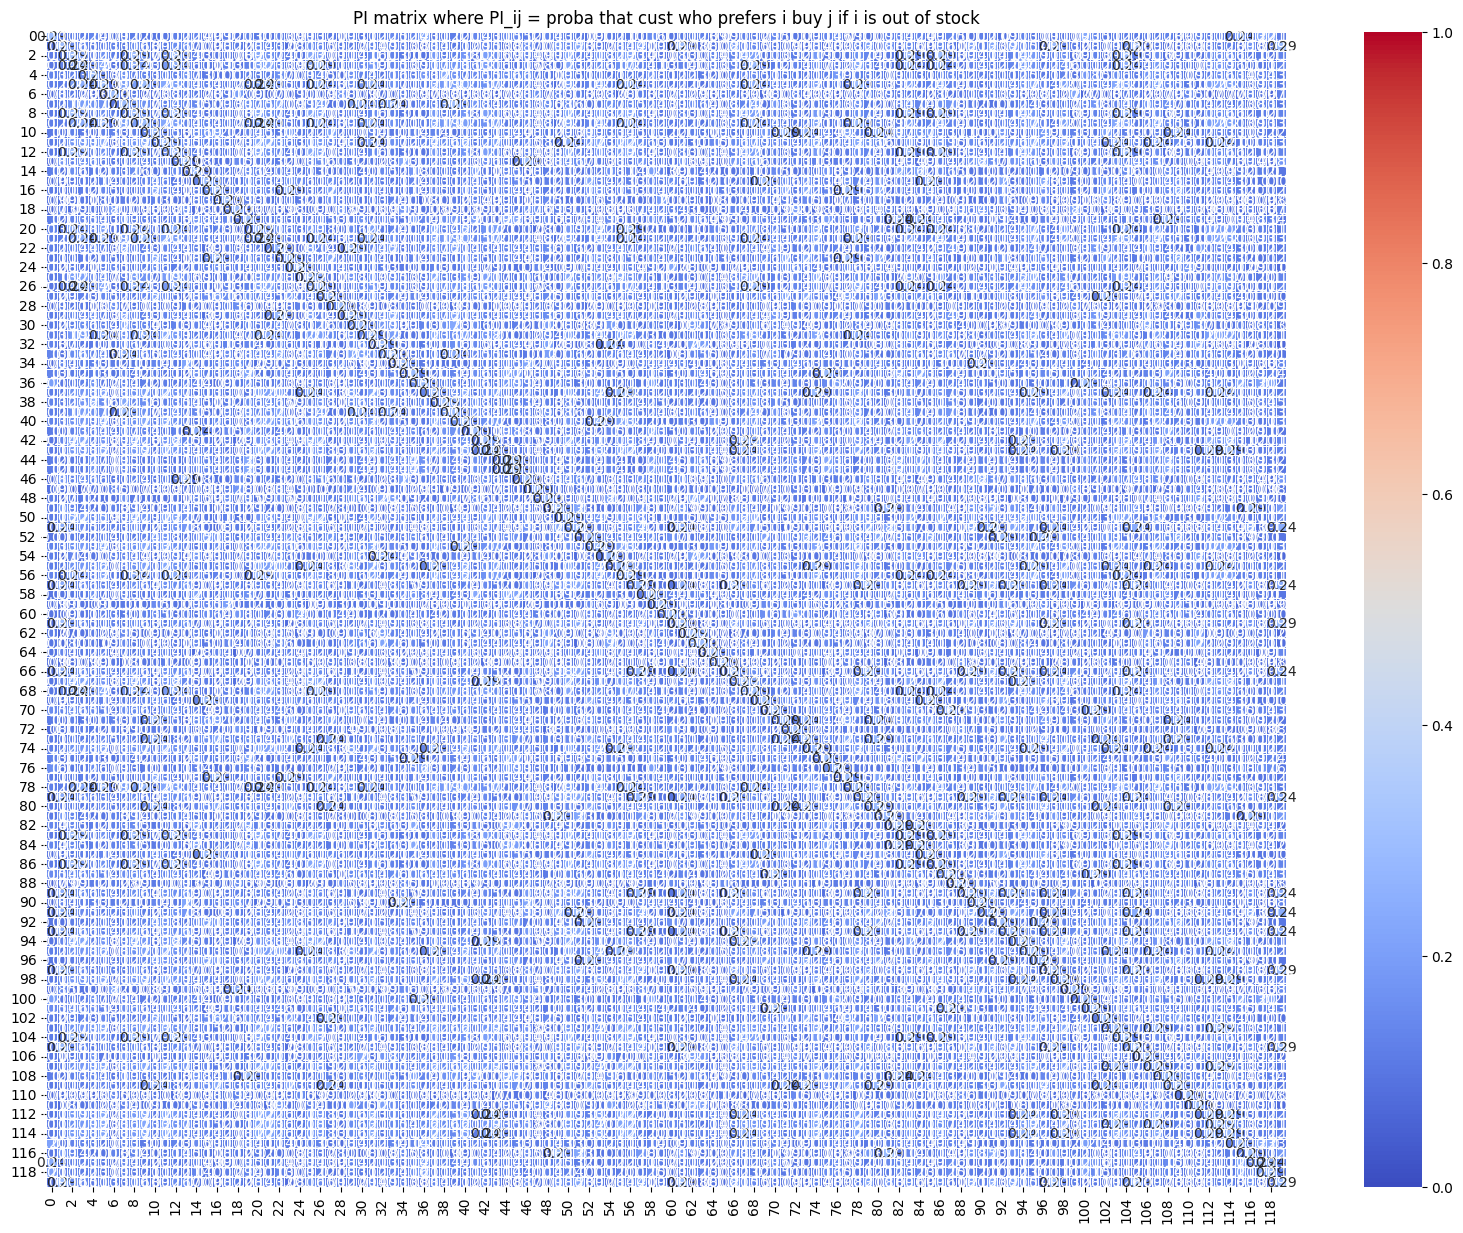

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(PI.round(2), annot=True, cmap="coolwarm", linewidths=0.5, vmin=0, vmax=1)
plt.title('PI matrix where PI_ij = proba that cust who prefers i buy j if i is out of stock')
plt.show()

Variables

In [ ]:
initial_guess = 0.5*np.random.rand((m+p))
fia = initial_guess[: m]    # m = 12
fia_rep = np.concatenate((np.exp(initial_guess[:N_Category])/np.sum(np.exp(initial_guess[:N_Category])), np.exp(initial_guess[N_Category:N_Category+ N_Collection])/np.sum(np.exp(initial_guess[N_Category:N_Category+N_Collection])),
                                                       np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])/np.sum(np.exp(initial_guess[N_Category+N_Collection:N_Category+N_Collection+N_Finish])),
                               np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style])/np.sum(np.exp(initial_guess[N_Category+N_Collection+N_Finish:N_Category+N_Collection+N_Finish+N_Style]))))

piia_flat = initial_guess[m:]
#pi_matrix = pi_flat.reshape((N_sku, N_sku))

#to compute the f
d_Category = {category : prop for category, prop in zip(Categories, fia_rep[:N_Category])} #to compute the fi
d_Collection = {col : prop for col, prop in zip(Collection, fia_rep[N_Category: N_Category + N_Collection])}
d_Finish = {finish : prop for finish, prop in zip(Finish, fia_rep[N_Category+N_Collection: N_Category+N_Collection+N_Finish])}
#d_Size = {size : prop for size, prop in zip(Size, f_Size)}
d_Style = {style : prop for style, prop in zip(Style, fia_rep[N_Category+N_Collection+N_Finish:])}



f = [
    d_Category[attr_tuple[0]] * d_Collection[attr_tuple[1]] * d_Finish[attr_tuple[2]] * d_Style[attr_tuple[3]]
    for sku in SKU_week.columns
    for attr_tuple in [sku_to_attributes(sku)]]
#computing of pi_aia
pi_Category = piia_flat[:N_Category**2].reshape(N_Category, N_Category)
np.fill_diagonal(pi_Category, 1)
pi_Category_rep = np.exp(pi_Category)/(1 + np.exp(pi_Category)) #it works it's not a mistake numpy is magic
#np.fill_diagonal(pi_Category_rep, 1)


pi_Collection = piia_flat[N_Category**2:(N_Category**2) + (N_Collection**2)].reshape(N_Collection, N_Collection)
np.fill_diagonal(pi_Collection, 1)
pi_Collection_rep = np.exp(pi_Collection)/(1 + np.exp(pi_Collection))
#np.fill_diagonal(pi_Category_rep, 1)


pi_Finish = piia_flat[(N_Category**2) + (N_Collection**2) : (N_Category**2) +(N_Collection**2) + (N_Finish**2)].reshape(N_Finish, N_Finish)
np.fill_diagonal(pi_Finish, 1)
pi_Finish_rep = np.exp(pi_Finish)/(1 + np.exp(pi_Finish))
#np.fill_diagonal(pi_Finish_rep, 1)


pi_Style = piia_flat[(N_Category**2)+(N_Collection**2)+ (N_Finish**2) :].reshape(N_Style, N_Style)
np.fill_diagonal(pi_Style, 1)
pi_Style_rep = np.exp(pi_Style)/(1 + np.exp(pi_Style))
#np.fill_diagonal(pi_Style_rep, 1)


coord_category = {category : i for i, category in enumerate(Categories)}
coord_collection = {collection : i for i,  collection in enumerate(Collection)}
coord_finish = {finish : i for i,  finish in enumerate(Finish)}
#coord_size = {size : i for i, size in enumerate(Size)}
coord_style = {style : i for i, style in enumerate(Style)}
PI = np.zeros((N_sku, N_sku))

# Cache the attribute lookup and coordinate assignments
attri_SKUs = [sku_to_attributes(sku) for sku in SKU_bed] #list of list of different level of attributes for each sku
coords = [
        [
            coord_category[attri[0]],
            coord_collection[attri[1]],
            coord_finish[attri[2]],
            #coord_size[attri[3]],
            coord_style[attri[3]]
        ]    for attri in attri_SKUs
    ]
#calcul PI matrix
for i in range(N_sku):
  coord_attr_sku_i = coords[i] # for sku i, list of different coordinates level for each attributes

  for j in range(N_sku):
    coord_attr_sku_j = coords[j] # for sku i, list of different coordinates level for each attributes


    PI[i, j] = (
          pi_Category_rep[coord_attr_sku_i[0], coord_attr_sku_j[0]] * #if sku i is not available, we look for each attribute the proba that cust replace each attribute of i by each attribute of j
          pi_Collection_rep[coord_attr_sku_i[1], coord_attr_sku_j[1]] * #thanks to the coordinates which allowed to find the components of pia at the right place
          pi_Finish_rep[coord_attr_sku_i[2], coord_attr_sku_j[2]] *
          #pi_Size_rep[coord_attr_sku_i[3], coord_attr_sku_j[3]] *
          pi_Style_rep[coord_attr_sku_i[3], coord_attr_sku_j[3]]
    )




d = 0
Z = [] #We will maximize the sum of each components of this vector
R = []
B = []
g = 0


Z = [] #We will maximize the sum of each components of this vector
for d in range(N) : # for each day of the week
# Calcule F_j(Sd) et F(Sd) for all d

  F_ = [] #Fj(Sd) for all j

  for j, sku in enumerate(list(Se.columns)): #add a check for j in S (done)
    if sku not in S[f'd{d}'] : #broadcasting only the sku in S[d]
      F_.append(0)
      continue
    r = 0 #terme de la somme
    for i, Sku in enumerate(list(Se.columns)) : #broadcasting all the skus
      #calcul of the set where j is the best substitute for i in S
      if Sku not in S[f'd{d}'] : #if the sku not in stock
        best_subst_of_i_idx = np.where(PI[i,:] == np.max(PI))[0].tolist() #check that add a condition to check that best_subst is in S and check if j is the best subst
        if j not in best_subst_of_i_idx :
          r = 0
        else :
          for idx_subst in best_subst_of_i_idx :
            r += f[i]*PI[i, idx_subst]
    F_.append(f[j] + r) #check indentation de ça
  F_ = np.array(F_) #all the Fj(S_d)

  F = np.sum(F_)

    # Compute z_d(fia, piia)
  Z.append(np.dot(X[d], np.array([np.log(F_[j] / F) if F_[j] > 0 and F > 0 else 0 for j in range(N_sku)])))


Z = np.array(Z)



In [ ]:
-np.sum(Z)

1388.3997494943692

In [ ]:
B[:5]

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  4

In [ ]:
row_indices, col_indices = np.where(PI == 1)

# Affichage des indices
for r, c in zip(row_indices, col_indices):
    print(f"Element à 1 trouvé à la position ({r},{c})")

SKU
12406         0.0
10544         0.0
7513727       0.0
12407         0.0
12410         0.0
10545         0.0
7550727       0.0
7550728       0.0
7559727       0.0
13196        19.0
13193         7.0
13197        19.0
7260727      16.0
12385         0.0
12403         6.0
7550729B1     6.0
12409         0.0
12404         6.0
12438        20.0
12384         0.0
12439         6.0
10287         0.0
7550729B2     6.0
13192         7.0
dtype: float64

In [ ]:
SKU_week.columns[12]

In [ ]:
d[]

In [ ]:
f_sol = result.x[: 12]
PI_sol = result.x[13 : ].reshape((7, 7))
PI_sol

In [ ]:
f_sol

In [ ]:
m = Model()

# Supposons que la longueur de X définisse la dimension de a et b
n = len(X)
f = m.addVars(n, name="a")
pi = m.addVars(n, n, name="pi")



In [ ]:
# Par exemple, si F_j est défini comme :
# F_j = a_j * sum(b_j)
# La fonction objective pourrait être :

Z = {j: m.addVar(name=f"Z_{j}") for j in range(n)}

m.addConstrs((Z[j] == a[j] * sum(b[j, k] for k in range(n)) for j in range(n)), "Z_definition")

objective_expr = sum(X[j] * Z[j] for j in range(n))
m.setObjective(objective_expr, GRB.MAXIMIZE)
